In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sal = pd.read_csv('salaries.csv')

In [3]:
sal.head(5)

,Function,sup1,sup2,sup3,sup4,sup5,salary,gender,disabled,race,...,inst4,inst5,instBudget,City,State,Zip,country,Category,instSize,instType
0,position1,16,1,0,350,135,125000,Woman,False,Caucasian,...,350,120,3100000,Edmonton,AB,T6G 2H9,CANADA,one,35630,Public Institution
1,position3,7,0,0,320,120,92000,Woman,False,Other,...,350,120,3100000,Edmonton,AB,T6G 2H9,CANADA,one,35630,Public Institution
2,position3,4,0,0,25,15,88000,Woman,False,Caucasian,...,350,120,3100000,Edmonton,AB,T6G 2H9,CANADA,one,35630,Public Institution
3,position5,0,0,0,5,0,75000,Woman,False,Caucasian,...,350,120,3100000,Edmonton,AB,T6G 2H9,CANADA,one,35630,Public Institution
4,position18,0,0,0,0,0,67000,Woman,False,Caucasian,...,350,120,3100000,Edmonton,AB,T6G 2H9,CANADA,one,35630,Public Institution


In [4]:
# eliminate rows with missing Y values (NaN)
sal['missingSalary'] = pd.isnull(sal['salary'])
sal2 = sal[(sal.missingSalary == False)]

In [5]:
# list of X vars to include
X_numeric_features = ['sup1', 'sup2', 'sup3', 'sup4', 'sup5', 'disabled', 'yearsInPosition', 
         'yearsInProfession', 'age', 'cred1', 'cred2', 'inst1', 'inst2', 'inst3', 'inst4', 'inst5', 'instBudget', 'instSize']
X_numeric = sal2[X_numeric_features]
X_categorical_features = ['Function', 'gender', 'race', 'highestDegree', 'Category', 'instType']
X_categorical = sal2[X_categorical_features]

In [6]:
# create dummy variables for each of the categorical features
# DOC: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

Function_dummies = pd.get_dummies(X_categorical['Function'])
gender_dummies = pd.get_dummies(X_categorical['gender'])
race_dummies = pd.get_dummies(X_categorical['race'])
highestDegree_dummies = pd.get_dummies(X_categorical['highestDegree'])
Category_dummies = pd.get_dummies(X_categorical['Category'])
instType_dummies = pd.get_dummies(X_categorical['instType'])

X_dummy_features = pd.concat([Function_dummies, gender_dummies, race_dummies, highestDegree_dummies, Category_dummies, instType_dummies], axis=1)

# convert to ndarray
X_dummy_features = X_dummy_features.as_matrix()

In [7]:
# impute missing values in numerical features
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html

from sklearn.preprocessing import Imputer
imp = Imputer()
imp.fit(X_numeric)
X_numeric_imputed = imp.transform(X_numeric)

In [8]:
X = np.concatenate((X_dummy_features, X_numeric_imputed), axis=1)

In [9]:
# y is salary
y = sal2.iloc[:, 6].values

In [10]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [11]:
# train/fit

from sklearn import datasets, linear_model
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Mean Squared Error, training data: 92170576
Mean Squared Error, test data: 124707325
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Variance score, training data: 0.74
Variance score, test data: 0.61
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Distribution of prediction error on training data:


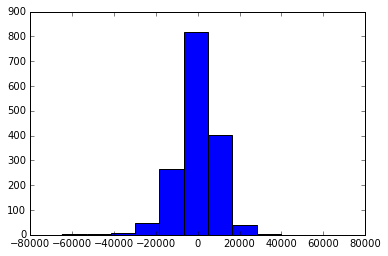

Distribution of prediction error on test data:


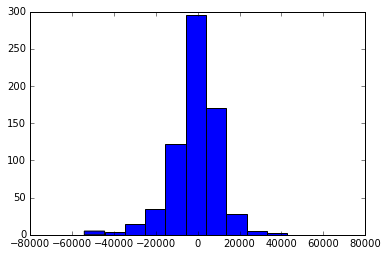

In [12]:
# The Mean Squared Error
print("Mean Squared Error, training data: %d"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Mean Squared Error, test data: %d"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
print(30 * '* ')

# Variance score
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
print('Variance score, test data: %.2f' % regr.score(X_test, y_test))
print(30 * '* ')

### GRAPHS: DISTRIBUTION OF ERROR ###
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.xlim(-80000, 80000)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.xlim(-80000, 80000)
plt.show()